In this notebook models are trained on CMAPS (using the automated pipeline) and the results are compared with the results from original code 

# import packages

In [5]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from utilities import *
from sklearn.metrics import mean_squared_error
import os
from datetime import datetime
import rul

In [6]:
pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_rows',300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# DATA PREPARATION
## Load the training data and test data

In [7]:

column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
               's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
               's15', 's16', 's17', 's18', 's19', 's20', 's21']

Data_id = "FD002"

train_FD = pd.read_table("./CMAPSSData/train_{}.txt".format(Data_id), header=None, delim_whitespace=True)
train_FD.columns = column_name


test_FD = pd.read_table("./CMAPSSData/test_{}.txt".format(Data_id), header=None, delim_whitespace=True)
test_FD.columns = column_name

RUL_FD = pd.read_table("./CMAPSSData/RUL_{}.txt".format(Data_id), header=None, delim_whitespace=True) # RUL for test data, for each entile engine

In [8]:
# train_FD

In [9]:
# test_FD

In [10]:
# RUL_FD

# RUL with pipeline

In [11]:
import importlib
import rul
importlib.reload(rul)

<module 'rul' from 'c:\\Users\\I539001\\OneDrive - SAP SE\\PA2\\AL\\AutoRUL\\rul.py'>

In [12]:
test = rul.RemainingUsefulLife(train_FD, test_FD, test_rul_per_rtf_id = RUL_FD, max_life=120,  epochs = 30, data_id = Data_id, rtf_id = "engine_id", path_to_trained_model=r"C:\Users\I539001\OneDrive - SAP SE\PA2\AL\AutoRUL\logs\FD002_2022_10_12_11_18_34\ep022-loss267.006-val_loss312.779.h5")

In [14]:
test_pred, train_pred = test.auto_rul()

valid Configuration!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 5, 12, 1, 10)     5900      
 er)                                                             
                                                                 
 batch_normalization (BatchN  (None, 5, 12, 1, 10)     40        
 ormalization)                                                   
                                                                 
 module_wrapper_1 (ModuleWra  (None, 8, 1, 20)         18160     
 pper)                                                           
                                                                 
 batch_normalization_1 (Batc  (None, 8, 1, 20)         80        
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None,

As you can see above, there the RMSE on test dataset is even worse than in the original jupyter notebook. This is caused due to the new PW RUL calcualtion function. A new problem has been detected -> to be discussed with Cahit on Monday th 17.10. 

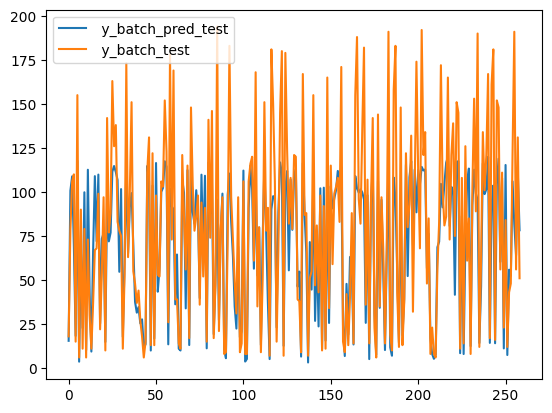

In [38]:
plt.plot(test_pred["y_batch_pred_test"], label = " y_batch_pred_test")
plt.plot(test_pred["y_batch_test"], label = " y_batch_test")
plt.legend()
plt.show()

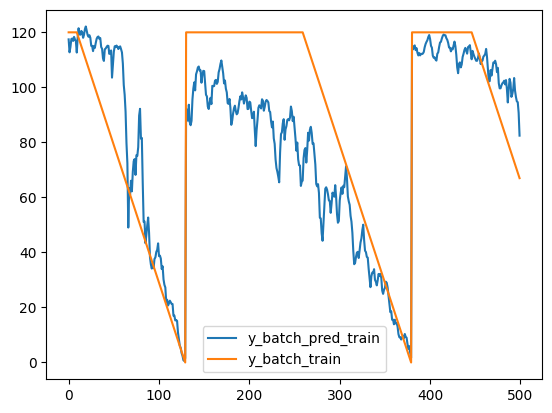

In [39]:
plt.plot(train_pred["y_batch_pred_train"][:500], label = "y_batch_pred_train")
plt.plot(train_pred["y_batch_train"][:500], label = "y_batch_train")
plt.legend()
plt.show()

Notice: for engine_id = 6: RUL value for the last cycle of enine_id = 6 is 155. however, 


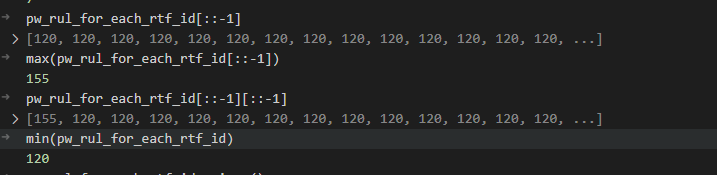

The figure shows the average RMSE

| Datasets               | FD001  | FD002  | FD003 | FD004  |
|------------------------------|--------|--------|-------|--------|
|   LSTM (2017)           | 16.14  | 24.49  | 16.18 | 28.17  | 
|   DCNN (2018)           | 12.61  | 22.36  | 12.64 | 23.31  |
|   DAG (2019)            | 11.96  | 20.34  | 12.46 | 22.43  | 
|   ECLSTM    | **14.92**  | **18.11**  | **13.85**  | **20.11** | 
|   Optimized Model        | 11.03 | 15.95  | 11.23  | 16.21  | 
|   Reproduced Results ECLSTM       | **14.64** | **16.39**  | **13.48**  | **19.98**  | 
|   Reproduced Results automated ECLSTM        | **to be trained** | **15.37**  | **to be trained**  | **to be trained**  | 

# Testing AutoRUL with same amount of data like in Kaggel Prod Plant dataset

In [40]:
train_FD.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.99830,0.84000,100.00000,449.44000,555.32000,1358.61000,1137.23000,5.48000,...,183.06000,2387.72000,8048.56000,9.34610,0.02000,334,2223,100.00000,14.73000,8.80710
1,1,2,41.99820,0.84080,100.00000,445.00000,549.90000,1353.22000,1125.78000,3.91000,...,130.42000,2387.66000,8072.30000,9.37740,0.02000,330,2212,100.00000,10.41000,6.26650
2,1,3,24.99880,0.62180,60.00000,462.54000,537.31000,1256.76000,1047.45000,7.05000,...,164.22000,2028.03000,7864.87000,10.89410,0.02000,309,1915,84.93000,14.08000,8.67230
3,1,4,42.00770,0.84160,100.00000,445.00000,549.51000,1354.03000,1126.38000,3.91000,...,130.72000,2387.61000,8068.66000,9.35280,0.02000,329,2212,100.00000,10.59000,6.47010
4,1,5,25.00050,0.62030,60.00000,462.54000,537.07000,1257.71000,1047.93000,7.05000,...,164.31000,2028.00000,7861.23000,10.89630,0.02000,309,1915,84.93000,14.13000,8.52860


In [41]:
rtf_ids_train = train_FD['engine_id'].unique()

In [42]:
train_data = train_FD.loc[train_FD['engine_id'].isin(list(rtf_ids_train[:6]))]
train_data

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,34.99830,0.84000,100.00000,449.44000,555.32000,1358.61000,1137.23000,5.48000,...,183.06000,2387.72000,8048.56000,9.34610,0.02000,334,2223,100.00000,14.73000,8.80710
1,1,2,41.99820,0.84080,100.00000,445.00000,549.90000,1353.22000,1125.78000,3.91000,...,130.42000,2387.66000,8072.30000,9.37740,0.02000,330,2212,100.00000,10.41000,6.26650
2,1,3,24.99880,0.62180,60.00000,462.54000,537.31000,1256.76000,1047.45000,7.05000,...,164.22000,2028.03000,7864.87000,10.89410,0.02000,309,1915,84.93000,14.08000,8.67230
3,1,4,42.00770,0.84160,100.00000,445.00000,549.51000,1354.03000,1126.38000,3.91000,...,130.72000,2387.61000,8068.66000,9.35280,0.02000,329,2212,100.00000,10.59000,6.47010
4,1,5,25.00050,0.62030,60.00000,462.54000,537.07000,1257.71000,1047.93000,7.05000,...,164.31000,2028.00000,7861.23000,10.89630,0.02000,309,1915,84.93000,14.13000,8.52860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,6,171,42.00150,0.84000,100.00000,445.00000,550.43000,1367.06000,1138.03000,3.91000,...,129.97000,2387.51000,8068.06000,9.49350,0.02000,333,2212,100.00000,10.59000,6.23360
1184,6,172,42.00360,0.84000,100.00000,445.00000,550.63000,1357.60000,1144.69000,3.91000,...,130.28000,2387.58000,8068.91000,9.47490,0.02000,332,2212,100.00000,10.51000,6.21010
1185,6,173,35.00740,0.84180,100.00000,449.44000,556.61000,1372.17000,1148.06000,5.48000,...,182.74000,2387.84000,8055.89000,9.38850,0.02000,336,2223,100.00000,14.61000,8.87020
1186,6,174,42.00540,0.84090,100.00000,445.00000,550.70000,1363.60000,1139.32000,3.91000,...,130.16000,2387.53000,8070.74000,9.48100,0.02000,333,2212,100.00000,10.41000,6.29440


In [43]:
rtf_ids_test = test_FD['engine_id'].unique()

In [44]:
test_data = test_FD.loc[test_FD['engine_id'].isin(list(rtf_ids_test[:2]))]
RUL_FD_shortended = RUL_FD[:2]

In [45]:
RUL_FD_shortended

,0
0,18
1,79


In [46]:
test = rul.RemainingUsefulLife(train_data, test_data, RUL_FD_shortended, rtf_id= "engine_id", data_id = Data_id + " same length as kaggel_plant")

In [47]:
test.auto_rul()

valid Configuration!
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_8 (ModuleWra  (None, 5, 12, 1, 10)     5660      
 pper)                                                           
                                                                 
 batch_normalization_8 (Batc  (None, 5, 12, 1, 10)     40        
 hNormalization)                                                 
                                                                 
 module_wrapper_9 (ModuleWra  (None, 8, 1, 20)         18160     
 pper)                                                           
                                                                 
 batch_normalization_9 (Batc  (None, 8, 1, 20)         80        
 hNormalization)                                                 
                                                                 
 flatten_4 (Flatten)         (Non

KeyboardInterrupt: 

We can see that the pipeline performs pretty well on CMPAS dataset despite being trained on a very small dataset (just 6 rtf_ids from CMAPSS).
The reason for that could be that, CMPASS dataset is a relatively simple dataset so the model learns the patterns easily. 
